# EDA for Diabetes Likelihood Prediction
```
--------------------------------------------------------------------------
     Machine Learning project by:
        Anggi B. Kurniawan (D.Eng graduate, Tokyo Institute of Technology)
        Ryza Rynazal (Kanda-Alvin laboratory, Tokyo Institute of Technology)
    
        See readme.md for a complete documentation
--------------------------------------------------------------------------
``` 

Exploratory Data Analysis (EDA) for diabetes predictive analysis from symptoms data.

Additional description of some medical-term attributes:
1. Polyuria: urinates more than usual or in abnormally large amounts
2. Polydipsia: excessive thirst, usually accompanied by mouth dryness
3. Polyphagia: blood glucose level remains abnormally high
4. Irritability: the easiness of feeling irritated
5. Delayed healing: slow healing process (e.g. hard to recover from bleeding, etc.)
6. Genital thrush: flek in genital
7. Partial paresis: weaken group of muscles
8. Alopecia: the cause of hairfall that creates small patches

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Data Reading

In [2]:
dfile = pd.read_csv('diabetes_data_upload.csv')

In [3]:
dfile.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# Check attributes type and missing data values
dfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

This data set has 16 attributes and 520 data points with __no missing values__.

# 2. Exploratory Data Analysis (EDA)

## Number of Positive and Negative Diabetes Cases

<AxesSubplot:xlabel='class', ylabel='count'>

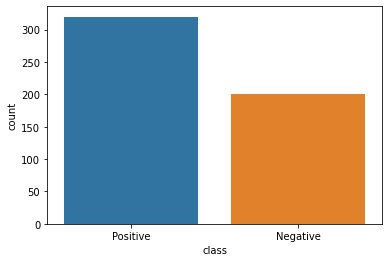

In [5]:
sns.countplot(data=dfile,x='class')

## Attributes Observation Based on "Symptoms Occurrence"

- Yes: Respondent have the symptom
- No: Respondent does not have the symptom

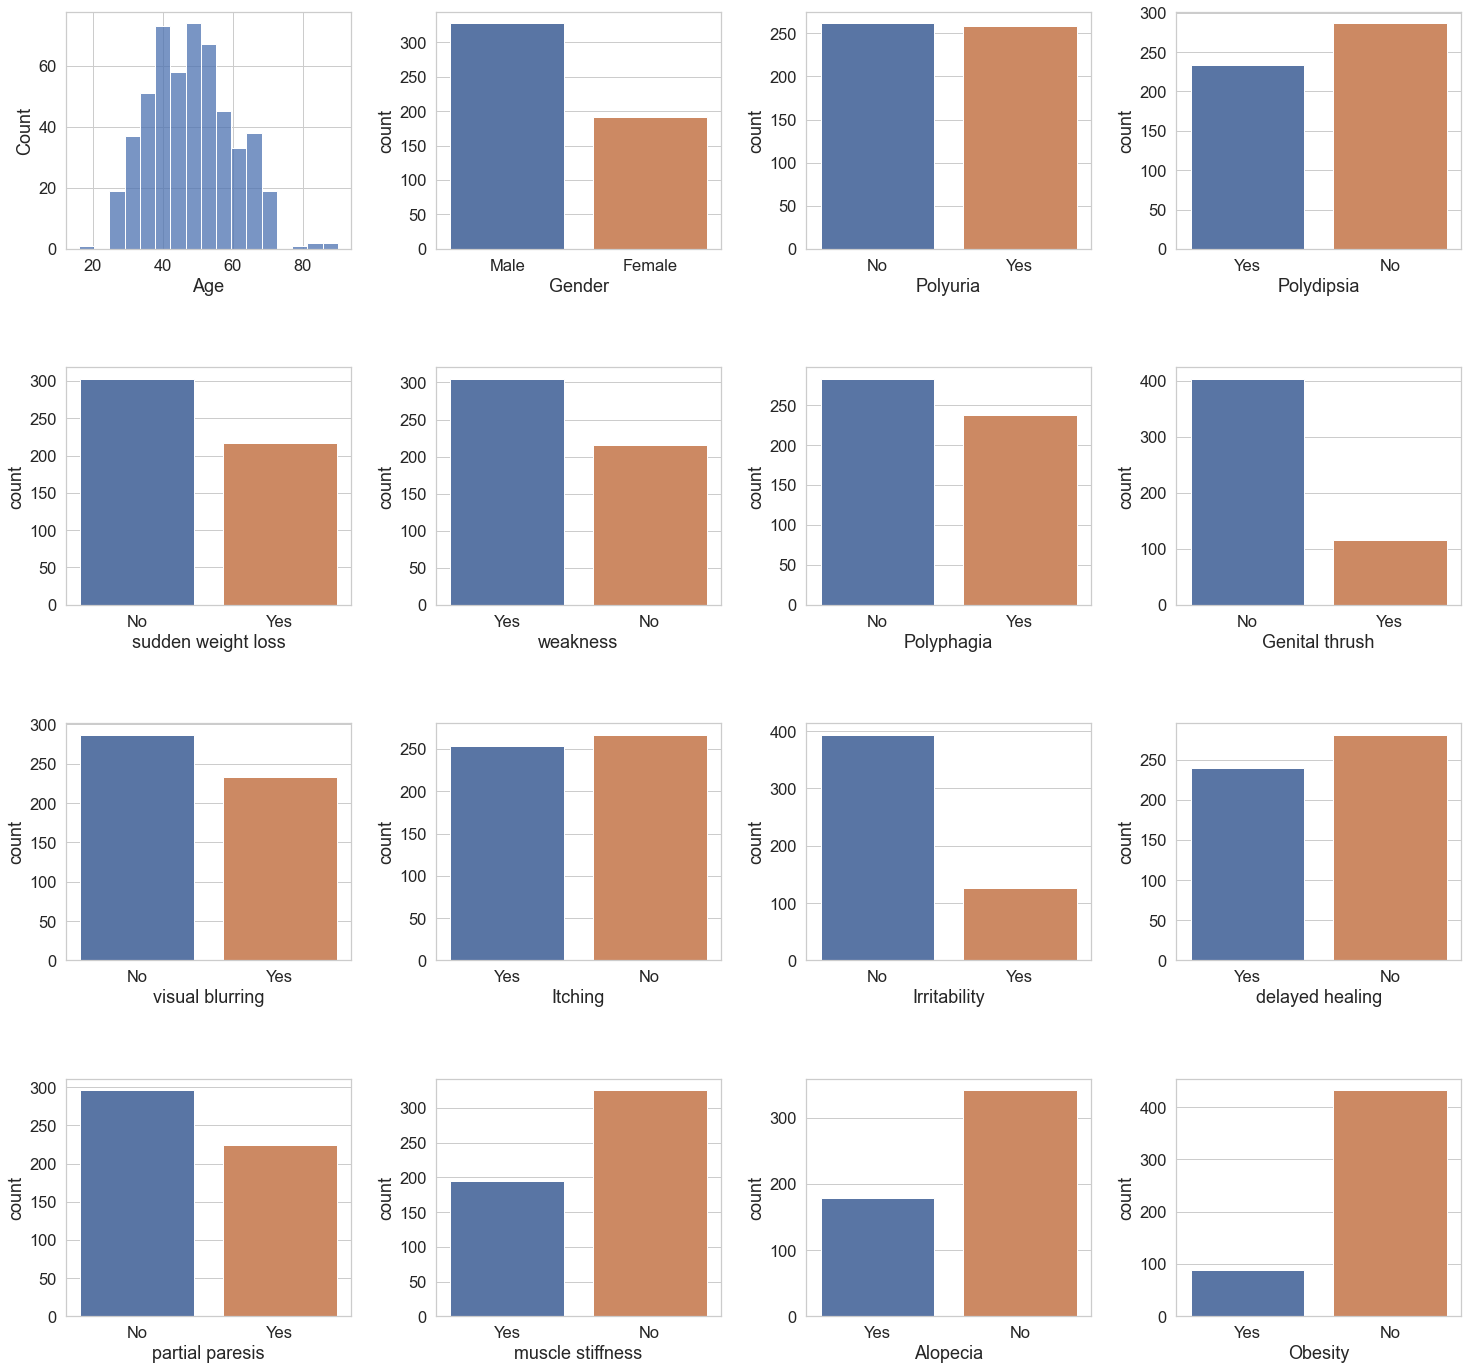

In [6]:
columns = dfile.columns

sns.set(font_scale=1.5,style='whitegrid')
fig = plt.figure(figsize=(25,24)) #(width,height)
fig.tight_layout(h_pad=1, w_pad=2)

nrows, ncols = 4,4
for i in range(1,len(columns)):
    ax = fig.add_subplot(nrows, ncols, i)
    
    if i == 1: # for attribute 'Age', we use histplot
        sns.histplot(dfile[columns[i-1]])
    
    else:
        sns.countplot(data=dfile, ax=ax, x=columns[i-1])
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
plt.show()

## Attributes Observation with Respect to "positive-negative" Diabetes Status

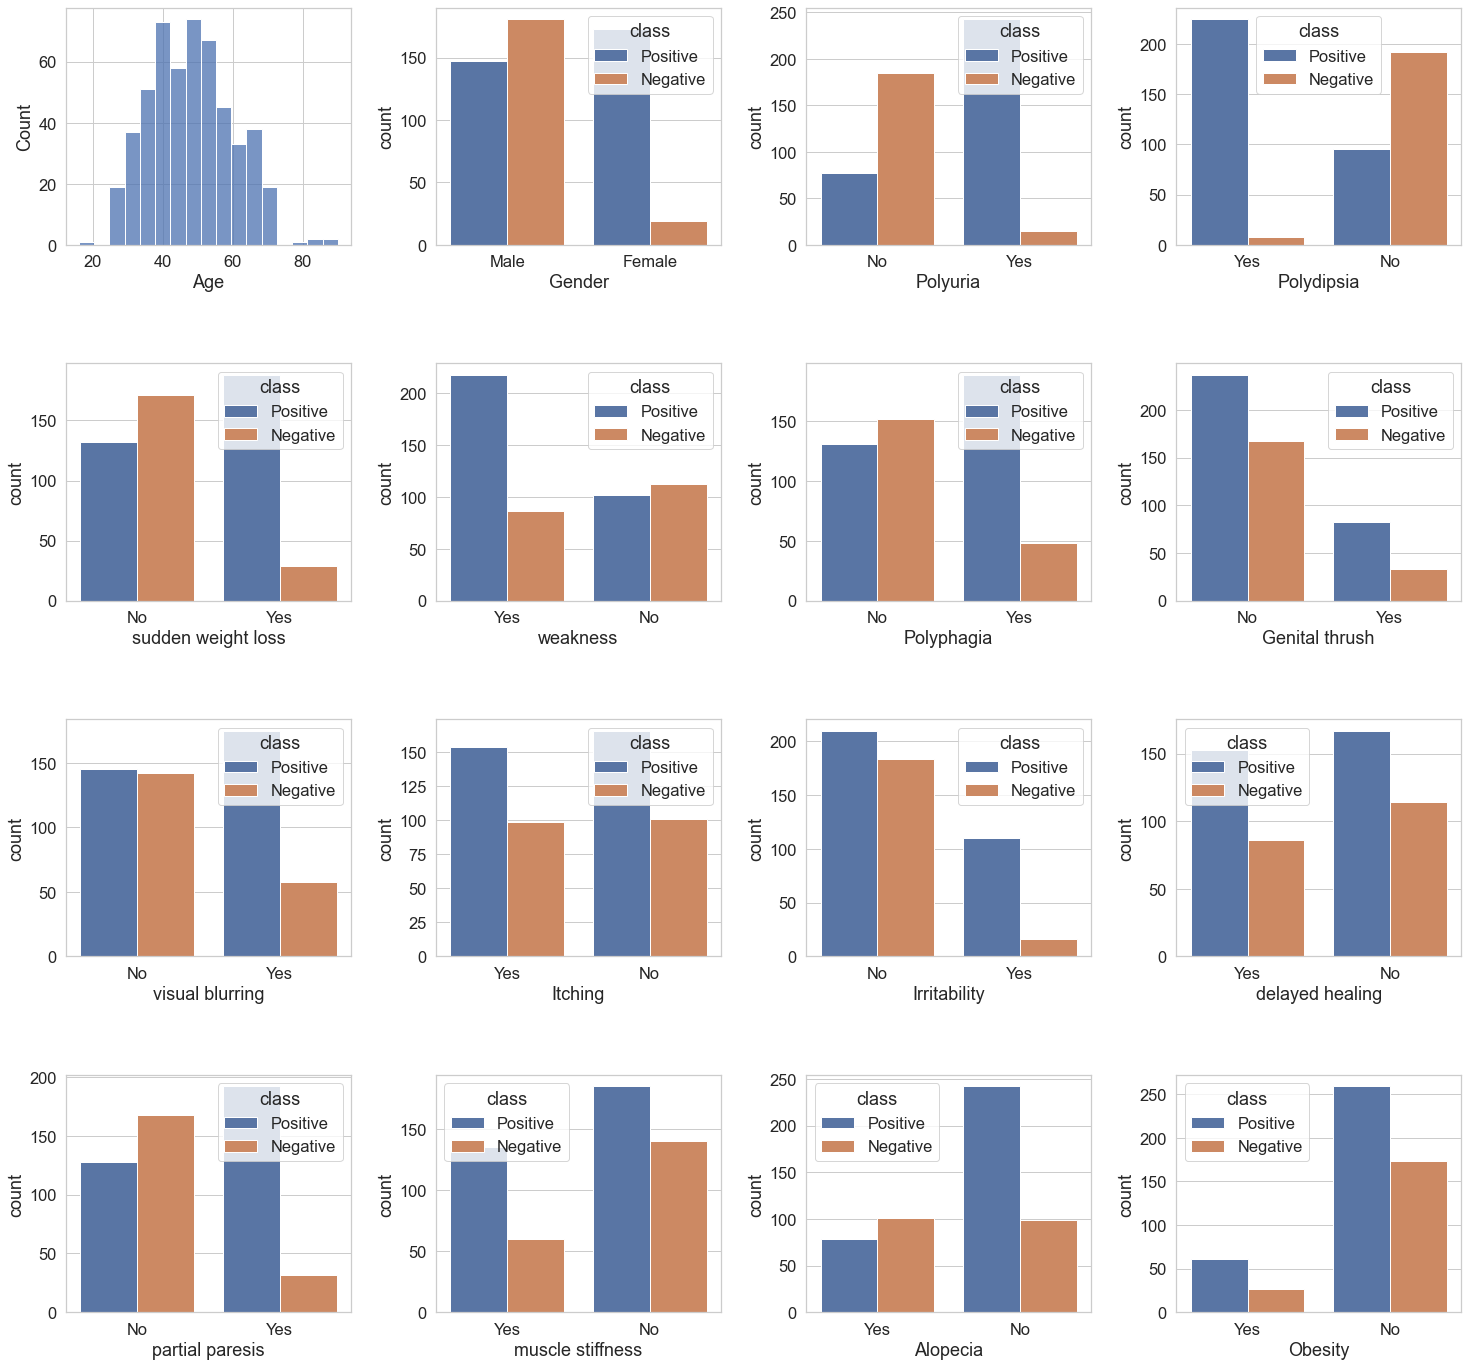

In [7]:
sns.set(font_scale=1.5,style='whitegrid')
fig = plt.figure(figsize=(25,24)) #(width,height)
fig.tight_layout(h_pad=1, w_pad=2)

nrows, ncols = 4,4
for i in range(1,len(columns)):
    ax = fig.add_subplot(nrows, ncols, i)
    
    if i == 1: # for attribute 'Age', we use displot
        sns.histplot(dfile[columns[i-1]])
    
    else:
        sns.countplot(data=dfile, ax=ax, x=columns[i-1], hue='class')
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
plt.show()

## Number of Cases on Different Age Groups

In [8]:
# create age bins (interval)
dfile['age_interval'] = pd.cut(x=dfile['Age'], bins=[0,9,19, 29, 39, 49,59,69,79,89,99],labels=['0-9','9-19','20s', '30s', '40s','50s','60s','70s','80s','90s'])
dfile.head(3)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_interval
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,40s
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,50s
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,40s


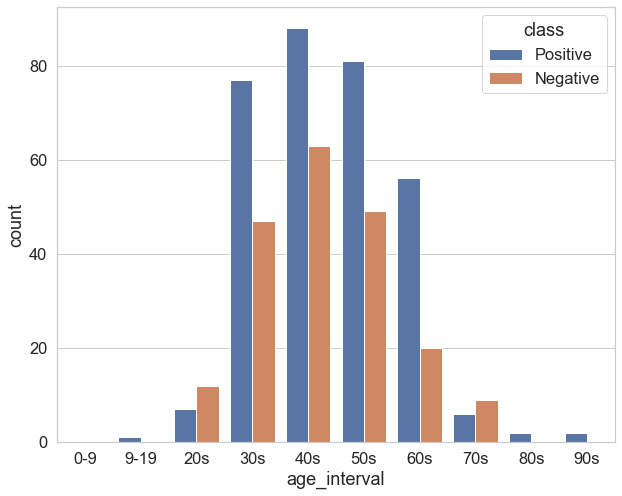

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data=dfile,x='age_interval',hue='class')
plt.show()

# 3. Features Selection

Based on the visual observation above, the following attributes are considered irrelevant, data-wise at the very least, to the risk of having diabetes:

- Itching
- Alopecia
- Genital Thrush

Attributes other than mentioned above are selected as feature datasets,

In [10]:
df_final = dfile.drop(['Itching','Alopecia','Genital thrush','age_interval'],axis=1)
df_final.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Irritability,delayed healing,partial paresis,muscle stiffness,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,Yes,No,No,Yes,No,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,No,No,Yes,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


then export to csv file:

In [11]:
df_final.to_csv('selected_data.csv',index=False)